<a href="https://colab.research.google.com/github/MelsonHeo00/Summer_MicroCredential/blob/main/Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Part 1: Overview
## In this project, we will be going over the data of diabetes within the 10 years mark between 1999 and 2008. In this analysis, we want to predict how often the patient will go back to the hospital based on the other variables.

# Part 2: Data Exploration (EDA) and Data Cleaning

## Loading up the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Loading up the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/ML-Data/main/dataset_diabetes.csv')

## EDA Part

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### To check if the data is null

In [4]:
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

Potential Conclusion: We can conclude that the data has no null values

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
# Dropping some of the columns because they provide no data or it provides too litte data

# Removing any ? within race
df = df[df['race'] != '?']

# Removing any Unknown/Invalid within gender
df = df[df['gender'] != 'Unknown/Invalid']

# Dropping weight, payer_code, and medical_specialty as it provides nothing
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  object
 4   age                       99492 non-null  object
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [10]:
# Next we have to check the readmitted, in this data, we have to compare the data to readmitted

In [11]:
df.readmitted.value_counts()

NO     53316
>30    35007
<30    11169
Name: readmitted, dtype: int64

In [12]:
# I had to search this up to organize the readmittance because I was not sure how to approach this but this allows the readmittance to get rid of >30 and <30

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

lbe = LabelEncoder()
df['readmitted'] = lbe.fit_transform(df['readmitted'])
df['readmitted'] = df['readmitted'].apply(lambda x: 'No_readmit' if x >1 
                                              else 'Readmit')
df['readmitted'] = df['readmitted'].astype('category')
df.readmitted.value_counts()

No_readmit    53316
Readmit       46176
Name: readmitted, dtype: int64

In [14]:
# Dropping some of the drugs and diagnosis because it is not needed
df = df.drop(['admission_source_id', 'diag_1', 'diag_2', 'diag_3', 
                  'max_glu_serum', 'metformin', 'repaglinide', 'nateglinide', 
                  'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                  'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
                  'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                  'examide', 'citoglipton', 'glyburide-metformin', 
                  'glipizide-metformin', 'glimepiride-pioglitazone', 
                  'metformin-rosiglitazone', 'metformin-pioglitazone', 
                  'diabetesMed'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  object  
 3   gender                    99492 non-null  object  
 4   age                       99492 non-null  object  
 5   admission_type_id         99492 non-null  int64   
 6   discharge_disposition_id  99492 non-null  int64   
 7   time_in_hospital          99492 non-null  int64   
 8   num_lab_procedures        99492 non-null  int64   
 9   num_procedures            99492 non-null  int64   
 10  num_medications           99492 non-null  int64   
 11  number_outpatient         99492 non-null  int64   
 12  number_emergency          99492 non-null  int64   
 13  number_inpatient          99492 non-null  int

The two variables that we will be using for data visualization is between time_in_hospital and num_medications to view the correlation between the time and medications for each patient

### Data Visualization

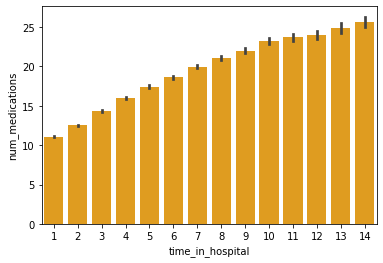

In [16]:
sns.barplot(data = df, x = "time_in_hospital", y = "num_medications", color = "orange")

We can see that the longer time spent in the hospital shows that the number of medications goes up as well

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


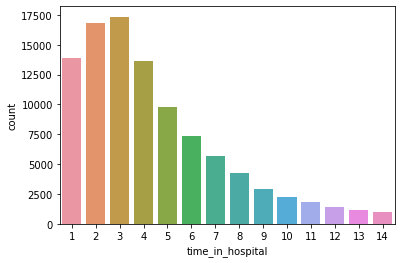

In [17]:
sns.countplot(df.time_in_hospital)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


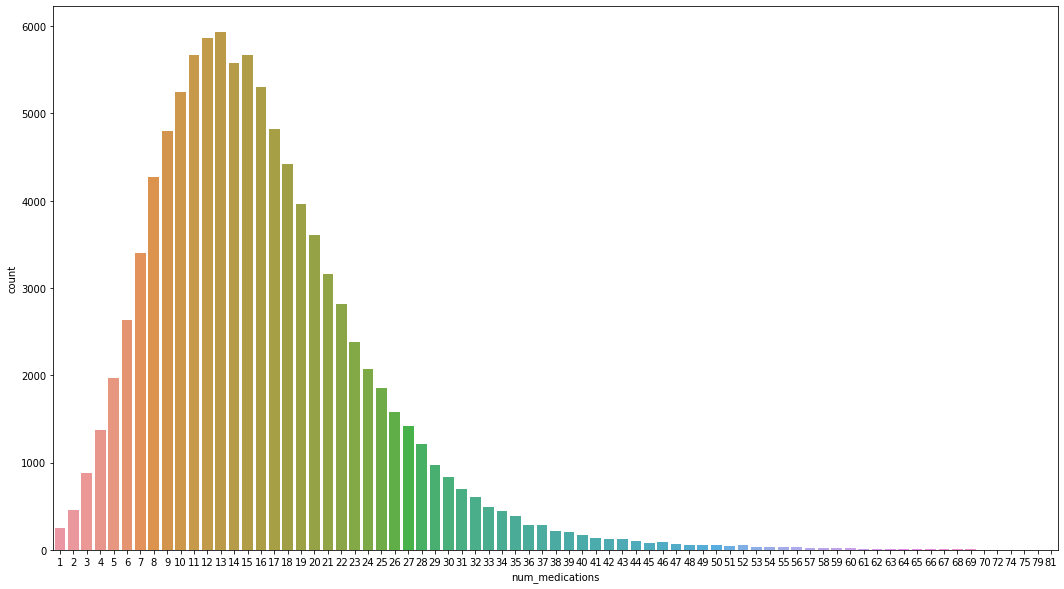

In [18]:
plt.figure(figsize = (18, 10))
sns.countplot(df.num_medications)
plt.show()

### Other data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


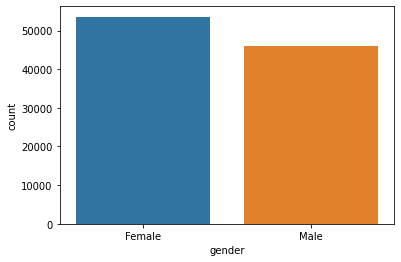

In [19]:
sns.countplot(df.gender)
plt.show()

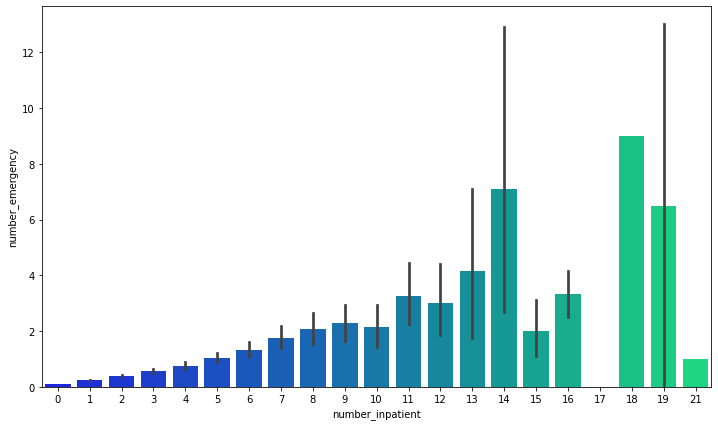

In [20]:
plt.figure(figsize = (12, 7))
sns.barplot(x = 'number_inpatient', y = 'number_emergency', data = df, palette = 'winter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee6ac43d90>,
      dtype=object)

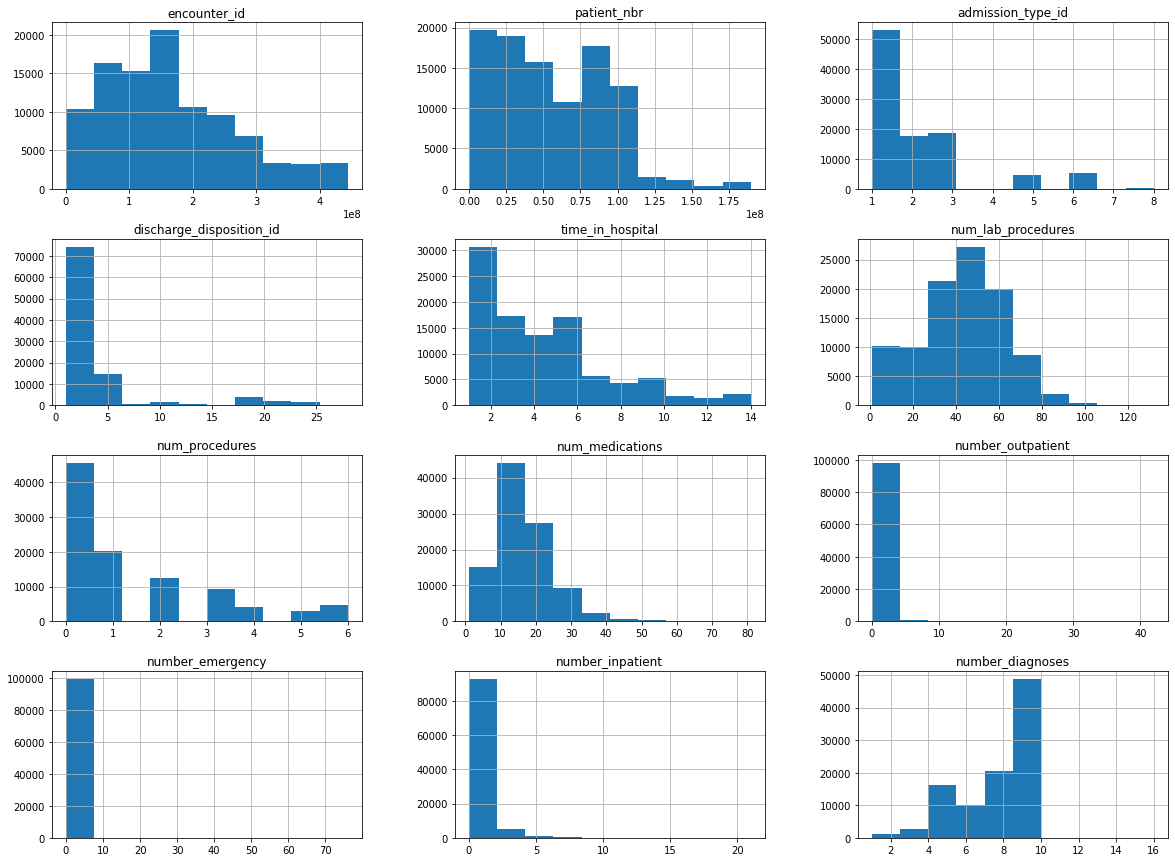

In [21]:
df.hist(figsize = (20, 15))

## Changing object to integer

In [22]:
# Changing the gender to integer
df['gender'] = df['gender'].replace(['Male'], 1 )
df['gender'] = df['gender'].replace(['Female'], 0 )

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  object  
 3   gender                    99492 non-null  int64   
 4   age                       99492 non-null  object  
 5   admission_type_id         99492 non-null  int64   
 6   discharge_disposition_id  99492 non-null  int64   
 7   time_in_hospital          99492 non-null  int64   
 8   num_lab_procedures        99492 non-null  int64   
 9   num_procedures            99492 non-null  int64   
 10  num_medications           99492 non-null  int64   
 11  number_outpatient         99492 non-null  int64   
 12  number_emergency          99492 non-null  int64   
 13  number_inpatient          99492 non-null  int

In [23]:
# Changing the age to integer

df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [24]:
df['age'] = df['age'].replace(['[0-10)'], 0)
df['age'] = df['age'].replace(['[10-20)'], 1)
df['age'] = df['age'].replace(['[20-30)'], 2)
df['age'] = df['age'].replace(['[30-40)'], 3)
df['age'] = df['age'].replace(['[40-50)'], 4)
df['age'] = df['age'].replace(['[50-60)'], 5)
df['age'] = df['age'].replace(['[60-70)'], 6)
df['age'] = df['age'].replace(['[70-80)'], 7)
df['age'] = df['age'].replace(['[80-90)'], 8)
df['age'] = df['age'].replace(['[90-100)'], 9)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  object  
 3   gender                    99492 non-null  int64   
 4   age                       99492 non-null  int64   
 5   admission_type_id         99492 non-null  int64   
 6   discharge_disposition_id  99492 non-null  int64   
 7   time_in_hospital          99492 non-null  int64   
 8   num_lab_procedures        99492 non-null  int64   
 9   num_procedures            99492 non-null  int64   
 10  num_medications           99492 non-null  int64   
 11  number_outpatient         99492 non-null  int64   
 12  number_emergency          99492 non-null  int64   
 13  number_inpatient          99492 non-null  int

In [25]:
# Changing the race to int

df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [26]:
df['race'] = df['race'].replace(['Caucasian'], 0)
df['race'] = df['race'].replace(['AfricanAmerican'], 1)
df['race'] = df['race'].replace(['Other'], 2)
df['race'] = df['race'].replace(['Asian'], 3)
df['race'] = df['race'].replace(['Hispanic'], 4)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  int64   
 3   gender                    99492 non-null  int64   
 4   age                       99492 non-null  int64   
 5   admission_type_id         99492 non-null  int64   
 6   discharge_disposition_id  99492 non-null  int64   
 7   time_in_hospital          99492 non-null  int64   
 8   num_lab_procedures        99492 non-null  int64   
 9   num_procedures            99492 non-null  int64   
 10  num_medications           99492 non-null  int64   
 11  number_outpatient         99492 non-null  int64   
 12  number_emergency          99492 non-null  int64   
 13  number_inpatient          99492 non-null  int

In [27]:
# Changing the change to int

df['change'].unique()

array(['No', 'Ch'], dtype=object)

In [28]:
df['change'] = df['change'].replace(['No'], 0)
df['change'] = df['change'].replace(['Ch'], 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  int64   
 3   gender                    99492 non-null  int64   
 4   age                       99492 non-null  int64   
 5   admission_type_id         99492 non-null  int64   
 6   discharge_disposition_id  99492 non-null  int64   
 7   time_in_hospital          99492 non-null  int64   
 8   num_lab_procedures        99492 non-null  int64   
 9   num_procedures            99492 non-null  int64   
 10  num_medications           99492 non-null  int64   
 11  number_outpatient         99492 non-null  int64   
 12  number_emergency          99492 non-null  int64   
 13  number_inpatient          99492 non-null  int

In [30]:
# Changing the A1Cresult to integer
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [31]:
df['A1Cresult'] = df['A1Cresult'].replace(['None'], 0)
df['A1Cresult'] = df['A1Cresult'].replace(['>7'], 1)
df['A1Cresult'] = df['A1Cresult'].replace(['>8'], 2)
df['A1Cresult'] = df['A1Cresult'].replace(['Norm'], 3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  int64   
 3   gender                    99492 non-null  int64   
 4   age                       99492 non-null  int64   
 5   admission_type_id         99492 non-null  int64   
 6   discharge_disposition_id  99492 non-null  int64   
 7   time_in_hospital          99492 non-null  int64   
 8   num_lab_procedures        99492 non-null  int64   
 9   num_procedures            99492 non-null  int64   
 10  num_medications           99492 non-null  int64   
 11  number_outpatient         99492 non-null  int64   
 12  number_emergency          99492 non-null  int64   
 13  number_inpatient          99492 non-null  int

In [32]:
# Changing the insulin to integer
df['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [33]:
df['insulin'] = df['insulin'].replace(['No'], 0)
df['insulin'] = df['insulin'].replace(['Up'], 1)
df['insulin'] = df['insulin'].replace(['Steady'], 2)
df['insulin'] = df['insulin'].replace(['Down'], 3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  int64   
 3   gender                    99492 non-null  int64   
 4   age                       99492 non-null  int64   
 5   admission_type_id         99492 non-null  int64   
 6   discharge_disposition_id  99492 non-null  int64   
 7   time_in_hospital          99492 non-null  int64   
 8   num_lab_procedures        99492 non-null  int64   
 9   num_procedures            99492 non-null  int64   
 10  num_medications           99492 non-null  int64   
 11  number_outpatient         99492 non-null  int64   
 12  number_emergency          99492 non-null  int64   
 13  number_inpatient          99492 non-null  int

# Part 3: Building and Evaluating Models

## Logistic Regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('readmitted', axis = 1), df['readmitted'], test_size = 0.5, random_state = 0)

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  No_readmit       0.57      0.76      0.65     26670
     Readmit       0.55      0.35      0.43     23076

    accuracy                           0.57     49746
   macro avg       0.56      0.55      0.54     49746
weighted avg       0.56      0.57      0.55     49746



In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[20203  6467]
 [15083  7993]]


In [50]:
print('The prediction Accuracy of the model is ', logmodel.score(X_test, y_test))
pp = logmodel.predict(X_test)
plist = pp.tolist()
print("Did Not Readmit: ", plist.count('1'))
print("Readmit: ", plist.count('0'))

The prediction Accuracy of the model is  0.5667993406505045
Did Not Readmit:  0
Readmit:  0


## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
pred = knn.predict(X_test)

In [43]:
print(confusion_matrix(y_test, pred))

[[15200 11470]
 [11520 11556]]


In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  No_readmit       0.57      0.57      0.57     26670
     Readmit       0.50      0.50      0.50     23076

    accuracy                           0.54     49746
   macro avg       0.54      0.54      0.54     49746
weighted avg       0.54      0.54      0.54     49746



## Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  No_readmit       0.61      0.60      0.60     26670
     Readmit       0.54      0.55      0.55     23076

    accuracy                           0.58     49746
   macro avg       0.57      0.58      0.58     49746
weighted avg       0.58      0.58      0.58     49746



In [48]:
print(confusion_matrix(y_test, predictions))

[[16018 10652]
 [10394 12682]]


# Part 4: Select Models

In [49]:
# I would choose the decision tree because it gave me a better precision